# Project 2: Data Representations and Clustering

##### Group Member
Yifu Yuan, 804973353  
Zhiquan You, 205667859  
Wenxuan Wu, 705846929

##### Part 1 - Clustering on Text Data

##### Clustering with Sparse Text Representations

##### QUESTION 1: Generate sparse TF-IDF representations

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

classes = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset = 'all', categories = classes, shuffle = True, random_state = 42,remove=('headers','footers'))
#print(dataset)
vectorizer = CountVectorizer(min_df=3, stop_words='english')
data_matrix = vectorizer.fit_transform(dataset.data)
tfidf_matrix = TfidfTransformer().fit_transform(data_matrix)

print('TF-IDF dimension: ', tfidf_matrix.shape)


TF-IDF dimension:  (7882, 23522)


##### Report the dimensions of the TF-IDF matrix you obtain.

The dimension of the TF-IDF matrix we obtained is 7882 X 23522

##### QUESTION 2: Report the contingency table of your clustering result.

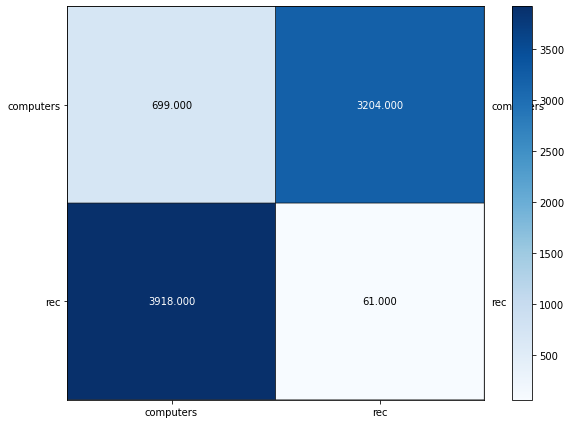

[0 1 1 ... 0 0 0]


In [3]:
from sklearn.cluster import KMeans
from plotmat import plot_mat
from sklearn.metrics.cluster import contingency_matrix

# print(dataset.target)
y_true = []
for i in range(len(dataset.target)):
    if(dataset.target[i] > 3):
        y_true.append(1)
    else:
        y_true.append(0)

# print(kmeans.labels_)
# print(y_true)
kmeans = KMeans(n_clusters=2, n_init=30, max_iter=1000)
kmeans.fit(tfidf_matrix)
y_pred = kmeans.fit(tfidf_matrix).predict(tfidf_matrix)
plot_mat(contingency_matrix(y_true, y_pred),size=(8, 6),xticklabels = ['computers','rec'],yticklabels = ['computers','rec'])

print(y_pred)


##### Does the contingency matrix have to be square-shaped?

No, the contingency matrix does not have to be square-shaped as the number of clusters and features need not to be exactly the same.

##### QUESTION 3: Report the 5 clustering measures explained in the introduction for Kmeans clustering.

In [4]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score

homogeneity_scores = homogeneity_score(y_true, y_pred)
completeness_scores = completeness_score(y_true, y_pred)
v_measure_scores = v_measure_score(y_true, y_pred)
adjusted_rand_scores = adjusted_rand_score(y_true, y_pred)
adjusted_mutual_info_scores = adjusted_mutual_info_score(y_true, y_pred)

print("Homogeneity score is: ", homogeneity_scores)
print("Completeness score is: ", completeness_scores)
print("V-measure score is: ", v_measure_scores)
print("Adjusted Rand-Index score is: ", adjusted_rand_scores)
print("Adjusted Mutual Information Score is: ", adjusted_mutual_info_scores)

Homogeneity score is:  0.5852081586556076
Completeness score is:  0.5979221204520263
V-measure score is:  0.5914968272016545
Adjusted Rand-Index score is:  0.6514561986152307
Adjusted Mutual Information Score is:  0.591459026407786


##### Clustering with Dense Text Representations

##### QUESTION 4: Report the plot of the percentage of variance that the top r principle components retain v.s. r, for r = 1 to 1000.

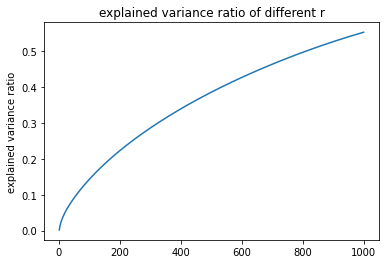

In [5]:
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
import numpy as np

# r_components = list(range(0, 1001, 100))
# r_components.remove(0)
# r_components.append(1)
# r_components.sort()
# explained_ratio = []

# for r in r_components:
#     svd = TruncatedSVD(n_components=r, random_state=0)
#     svd.fit(tfidf_matrix)
#     explained_ratio.append(svd.explained_variance_ratio_.sum())

svd = TruncatedSVD(n_components=1000, random_state=0)
svd.fit(tfidf_matrix)

#cumsum returns a list of sums
plt.plot(range(1, 1001),np.cumsum(svd.explained_variance_ratio_))
plt.title('explained variance ratio of different r')
plt.ylabel('explained variance ratio')
plt.show()


We can see that as the number of components r increases, the explained variance ratio increases as well.

##### QUESTION 5: Let r be the dimension that we want to reduce the data to (i.e. n components). Try r = 1, 2, 3, 5, 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD and NMF. Report a good choice of r for SVD and NMF respectively.

[0.018693650236151584, 0.5290568591667052, 0.535603103310649, 0.5185201977032754, 0.5469151624520435, 0.5693926123317269, 0.5699950375591004, 0.5765471440009426, 0.5779294191032718]


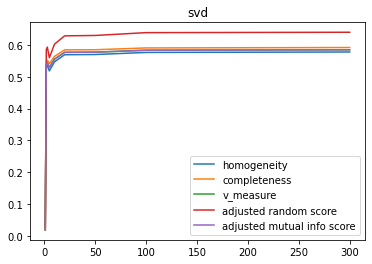

In [6]:
r_list = [1, 2, 3, 5, 10, 20, 50, 100, 300]
svd_homogeneity = []
svd_completeness = []
svd_v_measure_scores = []
svd_adjusted_rand_scores = []
svd_adjusted_mutual_info_scores = []

for r in r_list:
    svd = TruncatedSVD(n_components=r)
    reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix)
    kmeans_svd = kmeans.fit(reduced_tfidf_matrix)
    y_pred = kmeans_svd.predict(reduced_tfidf_matrix)
    svd_homogeneity.append(homogeneity_score(y_true, y_pred))
    svd_completeness.append(completeness_score(y_true, y_pred))
    svd_v_measure_scores.append(v_measure_score(y_true, y_pred))
    svd_adjusted_rand_scores.append(adjusted_rand_score(y_true, y_pred))
    svd_adjusted_mutual_info_scores.append(adjusted_mutual_info_score(y_true, y_pred))

print(svd_homogeneity)
#print(svd_completeness)
#print(svd_v_measure_scores)
#print(svd_adjusted_rand_scores)
#print(svd_adjusted_mutual_info_scores)
plt.plot(r_list, svd_homogeneity, label="homogeneity")
plt.plot(r_list, svd_completeness, label="completeness")
plt.plot(r_list, svd_v_measure_scores, label="v_measure")
plt.plot(r_list, svd_adjusted_rand_scores, label="adjusted random score")
plt.plot(r_list, svd_adjusted_mutual_info_scores, label="adjusted mutual info score")

plt.title('svd')
plt.legend()
plt.show()



In [7]:
print(svd_homogeneity.index(max(svd_homogeneity)))
print(svd_completeness.index(max(svd_completeness)))
print(svd_v_measure_scores.index(max(svd_v_measure_scores)))
print(svd_adjusted_rand_scores.index(max(svd_adjusted_rand_scores)))
print(svd_adjusted_mutual_info_scores.index(max(svd_adjusted_mutual_info_scores)))


svd_best_r = r_list[svd_homogeneity.index(max(svd_homogeneity))]
print("best r is: ", svd_best_r)

8
8
8
8
8
best r is:  300


[0.01669354511069125, 0.4925010094690228, 0.05500264536330463, 0.14643128967675492, 0.1517962672039418, 0.011712992798861595, 0.002330230250376704, 0.0059900830559919535, 0.016487169541558298]


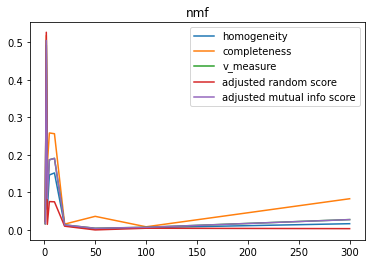

In [8]:
from sklearn.decomposition import NMF

nmf_homogeneity = []
nmf_completeness = []
nmf_v_measure_scores = []
nmf_adjusted_rand_scores = []
nmf_adjusted_mutual_info_scores = []

for r in r_list:
    #add tol=0.5 and max_iter = 50 to speed up NMF
    nmf = NMF(n_components=r, init='random', tol=0.05, max_iter=50)
    reduced_tfidf_matrix = nmf.fit_transform(tfidf_matrix)
    kmeans_nmf = kmeans.fit(reduced_tfidf_matrix)
    y_pred = kmeans_nmf.predict(reduced_tfidf_matrix)
    nmf_homogeneity.append(homogeneity_score(y_true, y_pred))
    nmf_completeness.append(completeness_score(y_true, y_pred))
    nmf_v_measure_scores.append(v_measure_score(y_true, y_pred))
    nmf_adjusted_rand_scores.append(adjusted_rand_score(y_true, y_pred))
    nmf_adjusted_mutual_info_scores.append(adjusted_mutual_info_score(y_true, y_pred))

print(nmf_homogeneity)
#print(nmf_completeness)
#print(nmf_v_measure_scores)
#print(nmf_adjusted_rand_scores)
#print(nmf_adjusted_mutual_info_scores)
plt.plot(r_list, nmf_homogeneity, label="homogeneity")
plt.plot(r_list, nmf_completeness, label="completeness")
plt.plot(r_list, nmf_v_measure_scores, label="v_measure")
plt.plot(r_list, nmf_adjusted_rand_scores, label="adjusted random score")
plt.plot(r_list, nmf_adjusted_mutual_info_scores, label="adjusted mutual info score")

plt.title('nmf')
plt.legend()
plt.show()

In [9]:
print(nmf_homogeneity.index(max(nmf_homogeneity)))
print(nmf_completeness.index(max(nmf_completeness)))
print(nmf_v_measure_scores.index(max(nmf_v_measure_scores)))
print(nmf_adjusted_rand_scores.index(max(nmf_adjusted_rand_scores)))
print(nmf_adjusted_mutual_info_scores.index(max(nmf_adjusted_mutual_info_scores)))

nmf_best_r = r_list[nmf_homogeneity.index(max(nmf_homogeneity))]
print("best r is: ", nmf_best_r)

1
1
1
1
1
best r is:  2


##### QUESTION 6: How do you explain the non-monotonic behavior of the measures as r increases?

We can observe from both graphes that as the number of component r increases, the graph follows a non-monotic behavior pattern. Since r stands for the number of dimensions, when it increases, the k-means's job to form clusters in higher dimensions also increases. And when the dimensionality increases, the Euclidean distance approach is no long a good measure as the distance between each points will most likely be approaching 1, making them all equidistant. And that makes it hard to form clusterings, and therefore, the graph at some point will just remain flat or just with a little inclination as there's no or little new information fed for the clustering.

##### QUESTION 7: Are these measures on average better than those computed in Question 3?

From svd chart we can see that the 5 measures stayed more or less the same compared to those computed in Q3, with the values between 0.5 and 0.6, regardless of the dimensionalities; however, from nmf chart the measures peaked at the first few components and then drops tremendously, the average measures are worse than those computed in Q3, with the values drop down to between 0.1 and 0.2, as the number of dimensions increase.

##### Visualize the clusters

##### QUESTION 8: Visualize the clustering results for:
• SVD with your optimal choice of r for K-Means clustering;


• NMF with your choice of r for K-Means clustering.

In [10]:
#svd best r = 300
#nmf best r = 2

svd = TruncatedSVD(n_components=svd_best_r, random_state=0)
svd_reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix)
y_pred_svd = kmeans.fit_predict(svd_reduced_tfidf_matrix)

nmf = NMF(n_components=nmf_best_r, init='random')
nmf_reduced_tfidf_matrix = nmf.fit_transform(tfidf_matrix)
y_pred_nmf = kmeans.fit_predict(nmf_reduced_tfidf_matrix)

<AxesSubplot:>

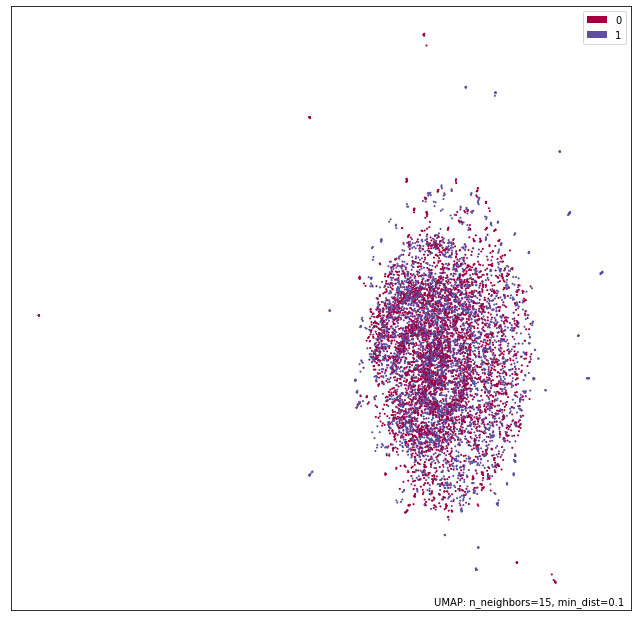

In [26]:
import umap.umap_ as umap

import umap.plot

mapper = umap.UMAP().fit(tfidf_matrix)

umap.plot.points(mapper, labels=np.array(y_true))


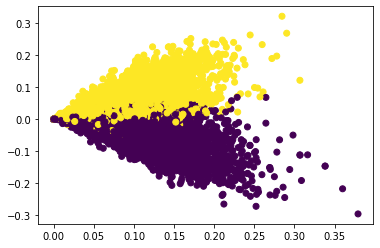

In [11]:
plt.scatter(svd_reduced_tfidf_matrix[:,0],svd_reduced_tfidf_matrix[:,1],c=y_true)
plt.show()

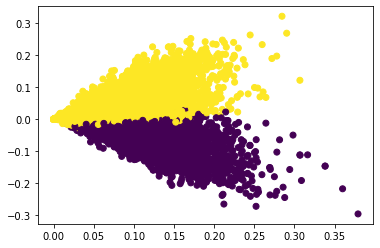

In [12]:
plt.scatter(svd_reduced_tfidf_matrix[:,0],svd_reduced_tfidf_matrix[:,1],c=y_pred_svd)
plt.show()

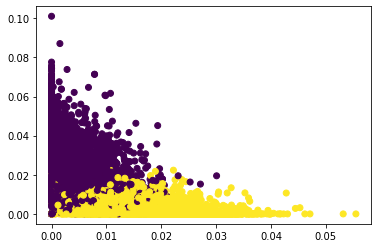

In [13]:
plt.scatter(nmf_reduced_tfidf_matrix[:,0],nmf_reduced_tfidf_matrix[:,1],c=y_true)
plt.show()

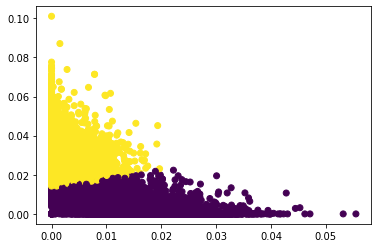

In [14]:
plt.scatter(nmf_reduced_tfidf_matrix[:,0],nmf_reduced_tfidf_matrix[:,1],c=y_pred_nmf)
plt.show()

##### QUESTION 9: What do you observe in the visualization? How are the data points of the two classes distributed? Is distribution of the data ideal for K-Means clustering?

We can observe from the graphes that even though there are clusters forming, these clusters are not rounded as k-means implicitly assumed. Some of the data points in two clusters are very close to each other and even overlaps in two clusters. This makes the decision boundary vague in both SVD and NMF.

##### Clustering of the Entire 20 Classes

##### QUESTION 10:  Load documents with the same configuration as in Question 1, but for ALL 20 categories. Construct the TF-IDF matrix, reduce its dimensionality properly using either NMF or SVD, and perform K-Means clustering with k=20 . Visualize the contingency matrix and report the five clustering metrics.

In [15]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

dataset_all = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 42,remove=('headers','footers'))
vectorizer_all = CountVectorizer(min_df=3, stop_words='english')
data_matrix_all = vectorizer_all.fit_transform(dataset_all.data)
tfidf_matrix_all = TfidfTransformer().fit(data_matrix_all).transform(data_matrix_all)

In [16]:
print(max(dataset_all.target))
kmeans = KMeans(n_clusters=20, n_init=30, max_iter=1000)

kmeans.fit(tfidf_matrix_all)
y_pred = kmeans.fit(tfidf_matrix_all).predict(tfidf_matrix_all)
print(y_pred)



19
[17 10 16 ...  3  1  6]


The contingency matrix for all the 20 categories: 


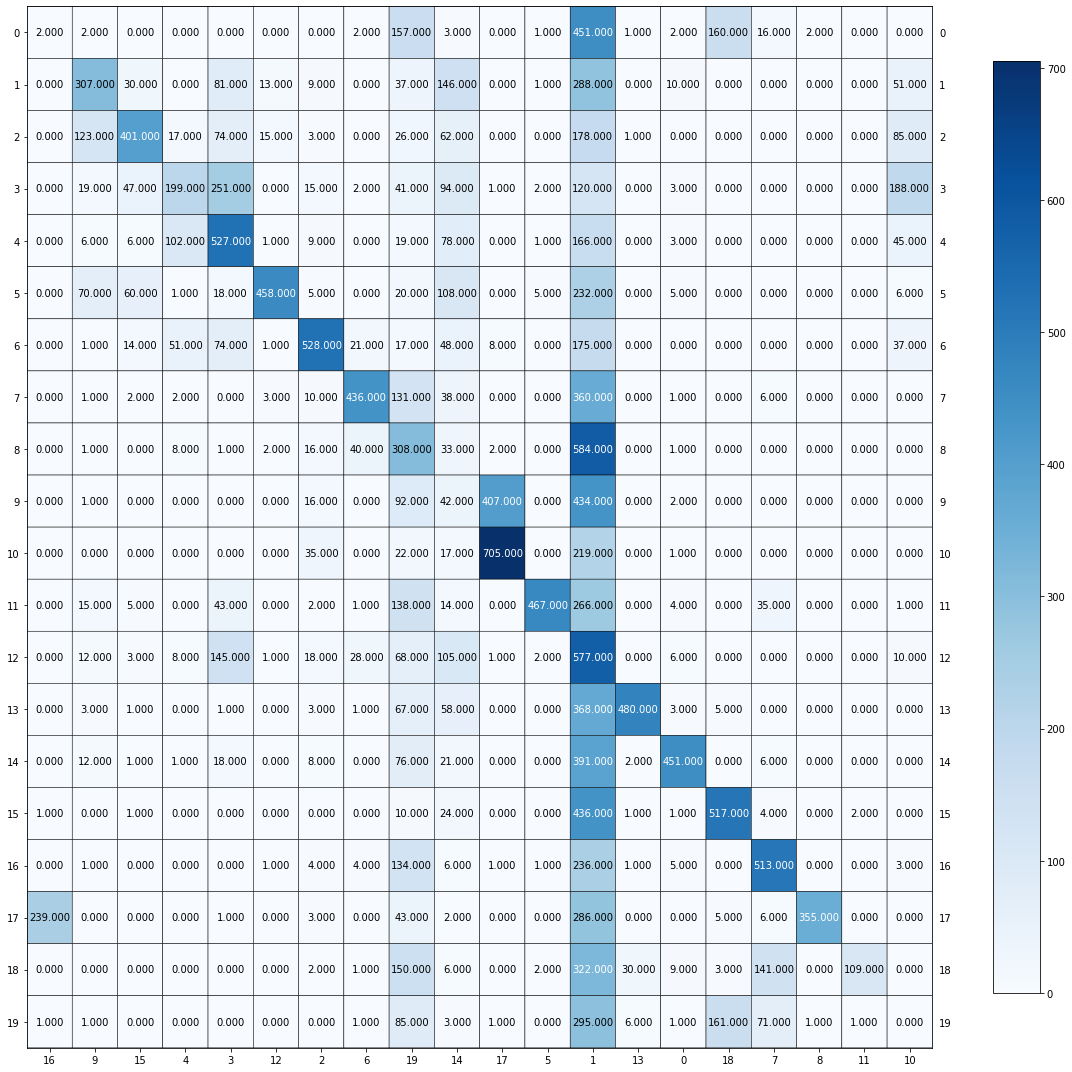

In [17]:
# plot_mat(contingency_matrix(dataset_all.target, y_pred),size=(8, 6),xticklabels = ,yticklabels = ['computers','rec'])

cm = confusion_matrix(dataset_all.target, y_pred)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("The contingency matrix for all the 20 categories: ")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))


In [18]:
svd_homogeneity_all = []
svd_completeness_all = []
svd_v_measure_scores_all = []
svd_adjusted_rand_scores_all = []
svd_adjusted_mutual_info_scores_all = []

for r in r_list:
    svd = TruncatedSVD(n_components=r)
    reduced_tfidf_matrix_all = svd.fit_transform(tfidf_matrix_all)
    kmeans_svd = kmeans.fit(reduced_tfidf_matrix_all)
    y_pred = kmeans_svd.predict(reduced_tfidf_matrix_all)
    svd_homogeneity_all.append(homogeneity_score(dataset_all.target, y_pred))
    svd_completeness_all.append(completeness_score(dataset_all.target, y_pred))
    svd_v_measure_scores_all.append(v_measure_score(dataset_all.target, y_pred))
    svd_adjusted_rand_scores_all.append(adjusted_rand_score(dataset_all.target, y_pred))
    svd_adjusted_mutual_info_scores_all.append(adjusted_mutual_info_score(dataset_all.target, y_pred))



In [19]:
print("Homogeneity: " , svd_homogeneity_all)
print("Completeness: ", svd_completeness_all)
print("V measure score: ", svd_v_measure_scores_all)
print("Adjusted Rand Index: ", svd_adjusted_rand_scores_all)
print("Adjusted mutual information score: ", svd_adjusted_mutual_info_scores_all)


Homogeneity:  [0.024188724454176396, 0.2118258316173791, 0.24684535455938175, 0.3219579721435891, 0.3273350368538333, 0.32844465693894104, 0.319127997674636, 0.30902121061925036, 0.29945478294570094]
Completeness:  [0.026070052232707485, 0.22443681809098948, 0.26498492313919647, 0.34983182868661455, 0.35631691819806083, 0.372398500049908, 0.379568581222766, 0.371574937671949, 0.38524194847628035]
V measure score:  [0.025094176640694743, 0.2179490527986417, 0.2555937003152683, 0.3353166303389404, 0.34121166680830484, 0.3490432812927196, 0.3467340902025824, 0.3374234114120477, 0.33697413400224063]
Adjusted Rand Index:  [0.00513924113077634, 0.06543965513950034, 0.08366092271966798, 0.1265463249316136, 0.12402778777921475, 0.11261429415861636, 0.1037974268682492, 0.09817234961243873, 0.10480282526657084]
Adjusted mutual information score:  [0.021788166728304515, 0.21534502181698773, 0.25309129549311976, 0.3330740574564257, 0.3389889469338978, 0.3468015940072047, 0.3444304990761669, 0.3350

##### UMAP

##### QUESTION 11: Use UMAP to reduce the dimensionality of the 20 category TF-IDF matrix, and apply K-Means clustering with n_components=20

In [20]:
# https://github.com/lmcinnes/umap
import umap.umap_ as umap

euc_homo = []
euc_comp = []
euc_vm = []
euc_ars = []
euc_amis = []

for r in r_list:
    mapper = umap.UMAP(n_components=r,metric="euclidean")
    umap_reduced_tfidf_matrix_all = mapper.fit_transform(tfidf_matrix_all)
    kmeans_euc = kmeans.fit(umap_reduced_tfidf_matrix_all)
    y_pred = kmeans_euc.predict(umap_reduced_tfidf_matrix_all)
    euc_homo.append(homogeneity_score(dataset_all.target, y_pred))
    euc_comp.append(completeness_score(dataset_all.target, y_pred))
    euc_vm.append(v_measure_score(dataset_all.target, y_pred))
    euc_ars.append(adjusted_rand_score(dataset_all.target, y_pred))
    euc_amis.append(adjusted_mutual_info_score(dataset_all.target, y_pred))


/Users/zacyou/Library/Python/3.8/lib/python/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [21]:
print(euc_homo)
print(euc_comp)
print(euc_vm)
print(euc_ars)
print(euc_amis)

print(euc_homo.index(max(euc_homo)))
print(euc_comp.index(max(euc_comp)))
print(euc_vm.index(max(euc_vm)))
print(euc_ars.index(max(euc_ars)))
print(euc_amis.index(max(euc_amis)))

euc_best_r = r_list[2]
print("best r is: ", euc_best_r)

[0.012393510368483473, 0.010016633598925066, 0.010339201389467345, 0.009850365650856072, 0.010898954850163834, 0.009088849814193879, 0.008876303907048981, 0.009463994536647377, 0.007431190098127978]
[0.013556146150555448, 0.010378273594938191, 0.010934449153188539, 0.010334743760422253, 0.011816290881808333, 0.00967259893527209, 0.009242293382635726, 0.010051927913103359, 0.008528904997521177]
[0.012948783175632465, 0.010194247318877182, 0.010628497600919315, 0.010086742942416918, 0.011339099945193535, 0.009371642905574872, 0.009055602213653487, 0.009749105234182617, 0.007942297835397164]
[0.0012731226784372946, 0.0018186693862511667, 0.001243537111391476, 0.0012594616214373624, 0.0012558116322717119, 0.0013502864990622319, 0.0015312136985661015, 0.001468161635578545, 0.001161173263282889]
[0.009578090128315037, 0.00692409985032308, 0.007347902881331914, 0.006825024516723411, 0.008029908042387714, 0.006094781499100247, 0.00576904240678744, 0.0064845738587458865, 0.005070874637432747]
0

In [22]:
cos_homo = []
cos_comp = []
cos_vm = []
cos_ars = []
cos_amis = []

for r in r_list:
    mapper = umap.UMAP(n_components=r,metric="cosine")
    umap_reduced_tfidf_matrix_all = mapper.fit_transform(tfidf_matrix_all)
    kmeans_euc = kmeans.fit(umap_reduced_tfidf_matrix_all)
    y_pred = kmeans_euc.predict(umap_reduced_tfidf_matrix_all)
    cos_homo.append(homogeneity_score(dataset_all.target, y_pred))
    cos_comp.append(completeness_score(dataset_all.target, y_pred))
    cos_vm.append(v_measure_score(dataset_all.target, y_pred))
    cos_ars.append(adjusted_rand_score(dataset_all.target, y_pred))
    cos_amis.append(adjusted_mutual_info_score(dataset_all.target, y_pred))

In [23]:
print(cos_homo)
print(cos_comp)
print(cos_vm)
print(cos_ars)
print(cos_amis)

print(cos_homo.index(max(cos_homo)))
print(cos_comp.index(max(cos_comp)))
print(cos_vm.index(max(cos_vm)))
print(cos_ars.index(max(cos_ars)))
print(cos_amis.index(max(cos_amis)))

cos_best_r = r_list[4]
print("best r is: ", cos_best_r)

[0.39937385130941216, 0.5641772769576393, 0.5691996483703708, 0.5762014663135667, 0.5759595725889481, 0.578536522418969, 0.5519740311249396, 0.5612166788497924, 0.5582244557341116]
[0.4071417764832227, 0.5916104521055178, 0.5804573351441035, 0.5893356864177922, 0.5970569691203849, 0.5996881210327656, 0.5886602322086537, 0.5971244218492122, 0.5905838523854979]
[0.40322040565559236, 0.5775682947579212, 0.5747733729203524, 0.5826945728311967, 0.5863185462750983, 0.5889224639910092, 0.5697271628252412, 0.578613993215108, 0.5739484076379514]
[0.24941045001644677, 0.44707178821272375, 0.45871427950512517, 0.46792337295658026, 0.45893587315226947, 0.4617471029226135, 0.4217736691215385, 0.44327035333702625, 0.4335707907498877]
[0.40127469650576914, 0.5761523400030707, 0.5733862522812113, 0.5813210757402918, 0.5849470520252724, 0.5875594574179483, 0.5682786185626386, 0.5771950818395881, 0.5725185369443438]
5
5
5
3
5
best r is:  10


##### QUESTION 12: Analyze the contingency matrix.

##### QUESTION 13: So far, we have attempted K-Means clustering with 4 different representation learning techniques (sparse representation, PCA, NMF, UMAP). Compare and contrast the results from the previous sections, and discuss which approach is best for the K-Means clustering task on the 20-class text data.

##### Clustering Algorithms that do not explicitly rely on the Gaussian distribution per cluster